In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv("C:/Users/waghm/Documents/classProject/Credit_Card_customer_dataset.csv")
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
bank.shape

(10127, 21)

In [4]:
# Check Missing data
bank.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
# check all the data types
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

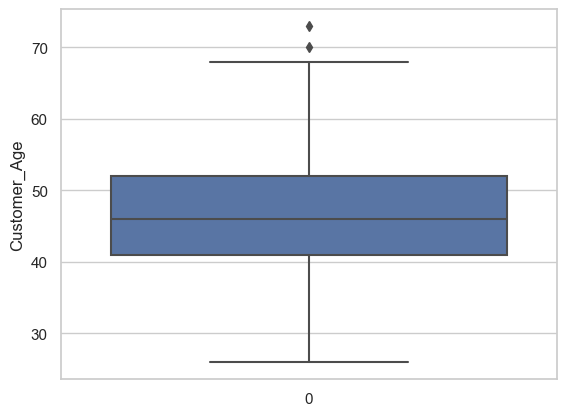

In [6]:
sns.set_theme(style='whitegrid')
sns.boxplot(bank['Customer_Age'])
plt.ylabel('Customer_Age')
plt.show()

In [7]:
# Most of the customers are somewhere near 45 years age, some outliers depicted by the dots on the upper side between 70 and maybe 75.

In [8]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
bank[['Gender', 'Credit_Limit']].groupby('Gender').agg(['mean', 'count'])

Credit_Limit      
                mean count
Gender                    
F        5023.854274  5358
M       12685.674963  4769

In [10]:
bank[['Gender', 'Avg_Utilization_Ratio']].groupby('Gender').agg(['mean', 'count'])

Avg_Utilization_Ratio      
                        mean count
Gender                            
F                   0.341957  5358
M                   0.199548  4769

In [11]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].max()

Card_Category
Blue        73
Gold        63
Platinum    56
Silver      65
Name: Customer_Age, dtype: int64

In [12]:
bank_cards = bank.groupby('Card_Category')
bank_cards['Customer_Age'].min()

Card_Category
Blue        26
Gold        29
Platinum    39
Silver      26
Name: Customer_Age, dtype: int64

In [13]:
bank_cards['Avg_Utilization_Ratio'].mean()

Card_Category
Blue        0.290859
Gold        0.057103
Platinum    0.043650
Silver      0.057310
Name: Avg_Utilization_Ratio, dtype: float64

In [14]:
bank_marital = bank.groupby('Marital_Status')
bank_marital['Card_Category'].value_counts()

Marital_Status  Card_Category
Divorced        Blue              696
                Silver             46
                Gold                5
                Platinum            1
Married         Blue             4433
                Silver            206
                Gold               41
                Platinum            7
Single          Blue             3624
                Silver            251
                Gold               58
                Platinum           10
Unknown         Blue              683
                Silver             52
                Gold               12
                Platinum            2
Name: count, dtype: int64

In [15]:
 # New Lets move foeword and  see if we have categorical data in our dataset.
bank.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [16]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [17]:
bank['Gender'].value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [18]:
bank['Education_Level'].value_counts()

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

In [19]:
bank['Marital_Status'].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [20]:
def ref1(x):
    if x=='M':
        return 1
    else:
        return 0
bank['Gender']=bank['Gender'].map(ref1)
bank['Gender'].value_counts()

Gender
0    5358
1    4769
Name: count, dtype: int64

In [21]:
def ref2(x):
    if x=='Existing Customer':
        return 1
    else:
        return 0
bank['Gender']=bank['Gender'].map(ref1)
bank['Attrition_Flag'] = bank['Attrition_Flag'].map(ref2)

In [22]:
bank['Attrition_Flag'].value_counts()

Attrition_Flag
1    8500
0    1627
Name: count, dtype: int64

In [23]:
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [24]:
# converting categorical data into numerical data.
y = bank['Card_Category'] 
x = bank.copy()

In [25]:
x.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [26]:
x['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [27]:
# change the feature
from sklearn.preprocessing import LabelEncoder 

def label_encoder(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name, le.classes_)
    return le.transform(feat)

In [28]:
x['Income_Category'] = label_encoder(x['Income_Category'])
x.head()

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,High School,Married,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,Graduate,Single,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,0,3,Graduate,Married,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,High School,Unknown,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,0,3,Uneducated,Married,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [29]:
x['Income_Category'].value_counts()

Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64

In [30]:
x['Education_Level'] = label_encoder(x['Education_Level'])
x['Marital_Status'] = label_encoder(x['Marital_Status'])
x.head()

Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,0,3,3,1,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,0,3,2,1,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,0,3,5,1,2,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int32  
 6   Marital_Status            10127 non-null  int32  
 7   Income_Category           10127 non-null  int32  
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [32]:
x = x.drop(['CLIENTNUM','Card_Category'], axis=1)
x.shape

(10127, 19)

In [33]:
y.value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [34]:
y

0          Blue
1          Blue
2          Blue
3          Blue
4          Blue
          ...  
10122      Blue
10123      Blue
10124      Blue
10125      Blue
10126    Silver
Name: Card_Category, Length: 10127, dtype: object

In [35]:
y = bank[['Card_Category']]
y

,Card_Category
0,Blue
1,Blue
2,Blue
3,Blue
4,Blue
...,...
10122,Blue
10123,Blue
10124,Blue
10125,Blue


In [36]:
y['Card_Category'] = label_encoder(y['Card_Category'])
y.head()

Card_Category ['Blue' 'Gold' 'Platinum' 'Silver']


,Card_Category
0,0
1,0
2,0
3,0
4,0


In [37]:
y['Card_Category'].value_counts()

Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64

In [38]:
x.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,0,3,3,1,2,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,0,3,2,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,0,3,5,1,2,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
x.describe()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.0,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,0.0,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.0,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.0,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,1.000000,41.000000,0.0,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,1.000000,46.000000,0.0,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,1.000000,52.000000,0.0,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,0.0,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


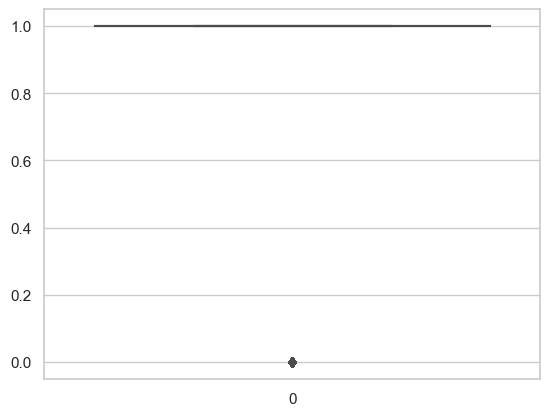

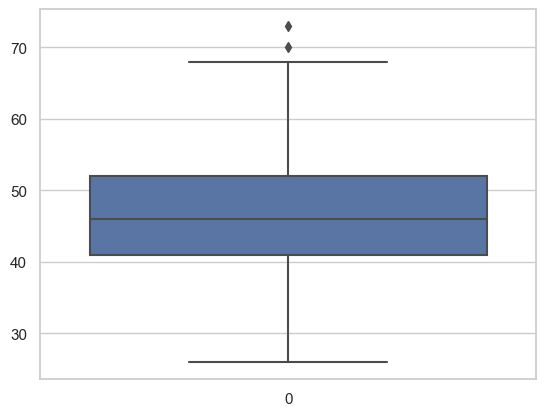

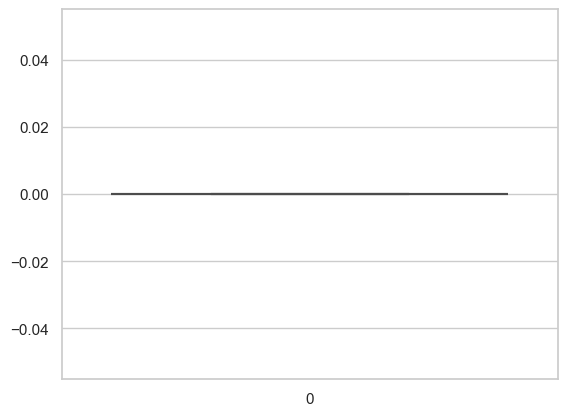

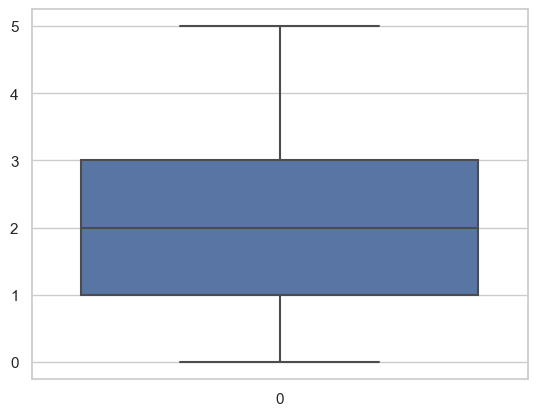

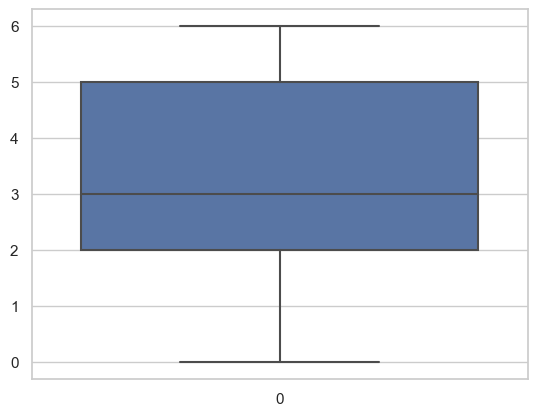

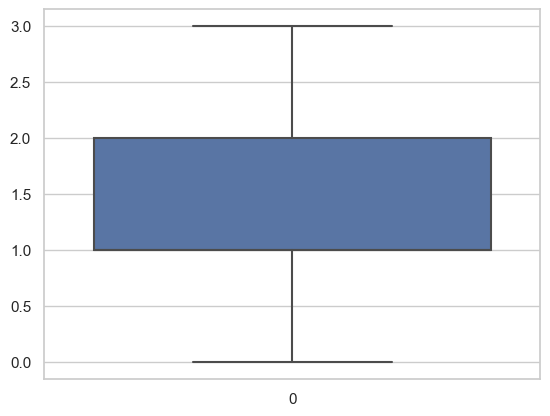

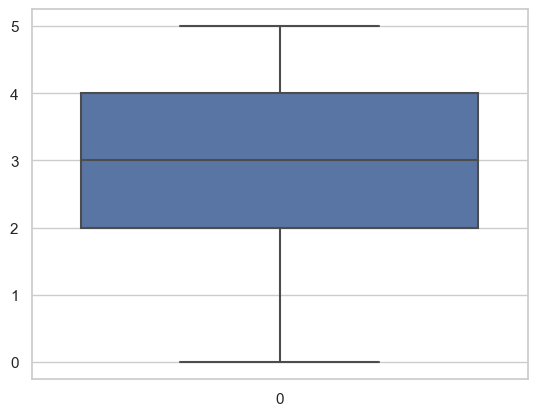

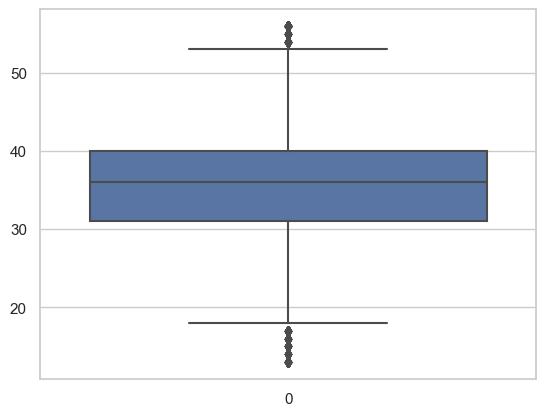

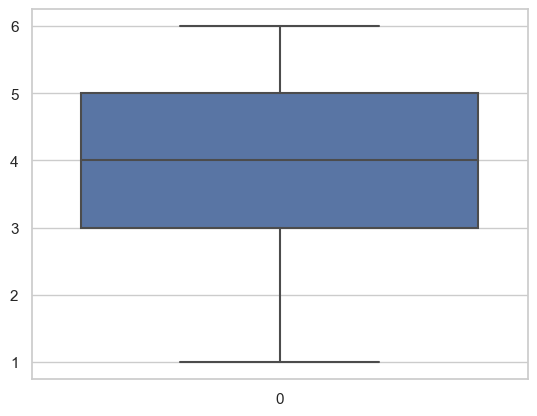

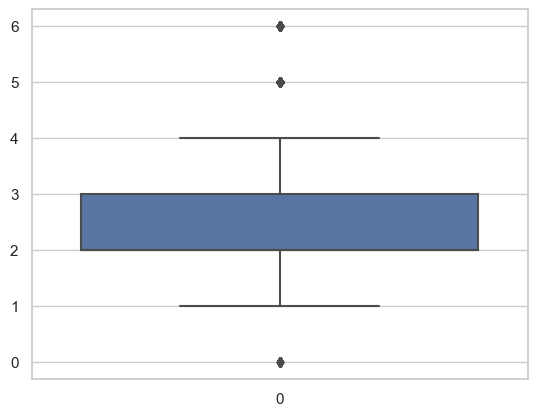

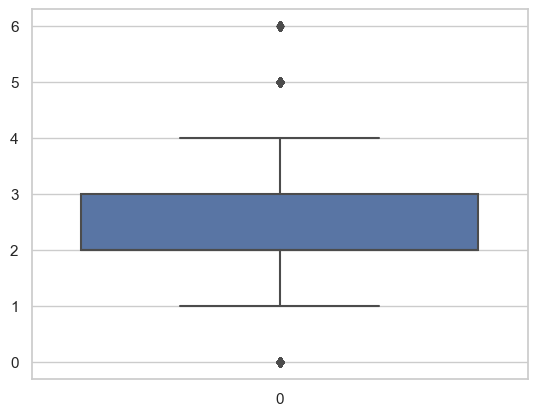

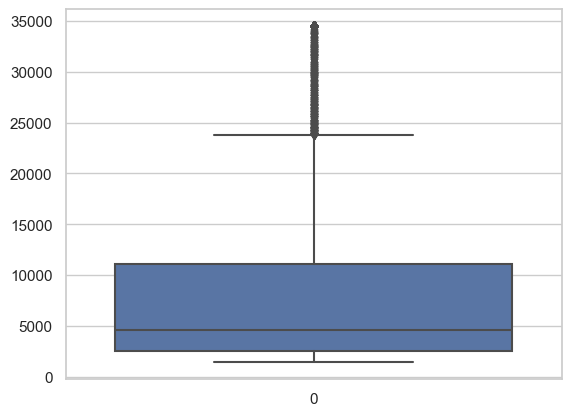

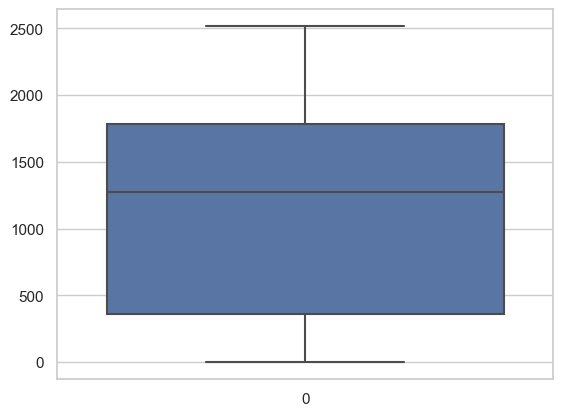

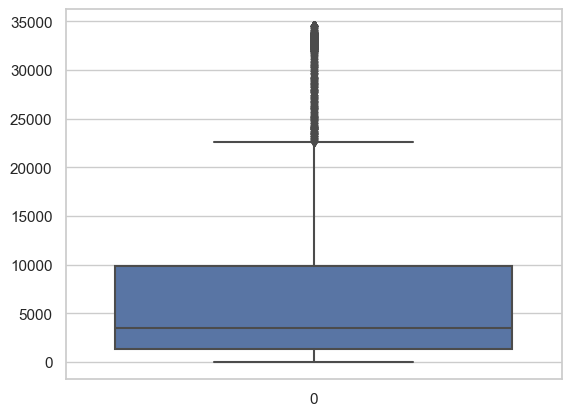

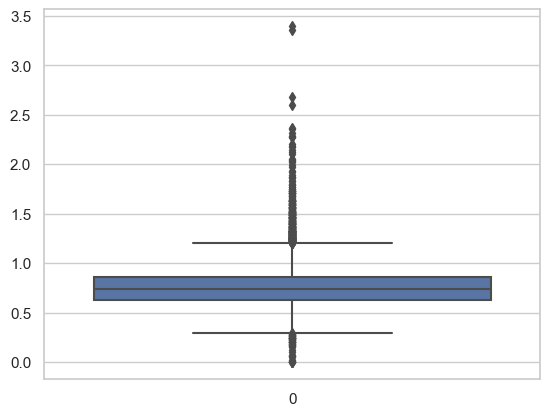

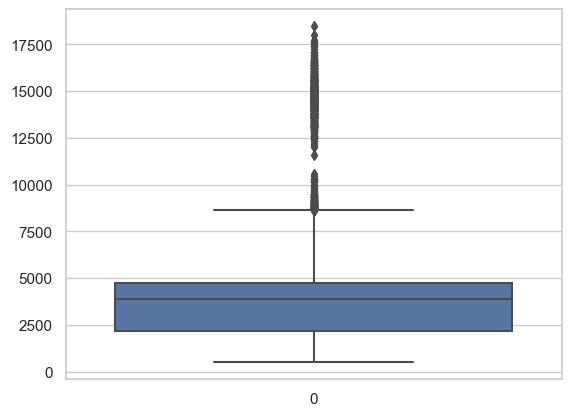

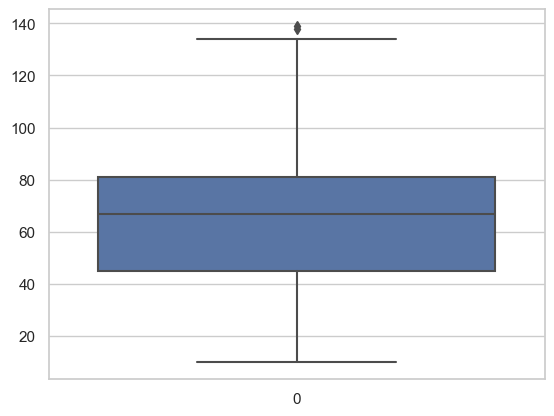

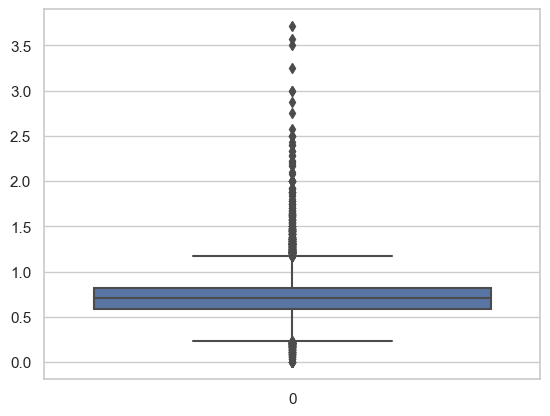

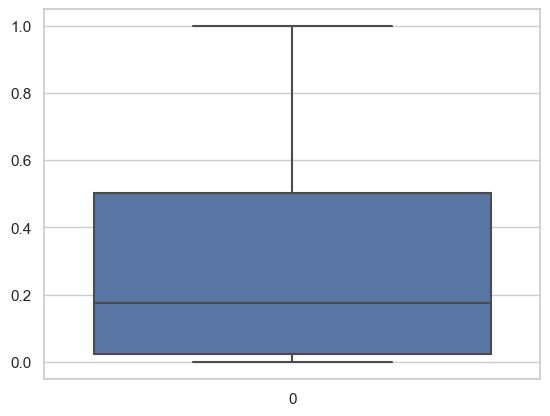

In [40]:
# outlier
def boxplots(col):
    sns.boxplot(x[col])
    plt.show()

for i in list(x.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [41]:
# Let's check the number of outliers per columns
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR
print(UL)
print()
print(LL)

Attrition_Flag                  1.000
Customer_Age                   68.500
Gender                          0.000
Dependent_count                 6.000
Education_Level                 9.500
Marital_Status                  3.500
Income_Category                 7.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_Trans_Ct                135.000
Total_Ct_Chng_Q4_Q1             1.172
Avg_Utilization_Ratio           1.223
dtype: float64

Attrition_Flag                  1.000
Customer_Age                   24.500
Gender                          0.000
Dependent_count                -2.000
Education_Level                -2.500
Marital_Status                 -0.500
Income_Category                -1.

In [42]:
((x>UL) | (x<LL)).sum()

Attrition_Flag              1627
Customer_Age                   2
Gender                         0
Dependent_count                0
Education_Level                0
Marital_Status                 0
Income_Category                0
Months_on_book               386
Total_Relationship_Count       0
Months_Inactive_12_mon       331
Contacts_Count_12_mon        629
Credit_Limit                 984
Total_Revolving_Bal            0
Avg_Open_To_Buy              963
Total_Amt_Chng_Q4_Q1         396
Total_Trans_Amt              896
Total_Trans_Ct                 2
Total_Ct_Chng_Q4_Q1          394
Avg_Utilization_Ratio          0
dtype: int64

In [43]:
x[((x>UL) | (x<LL))] = np.NaN

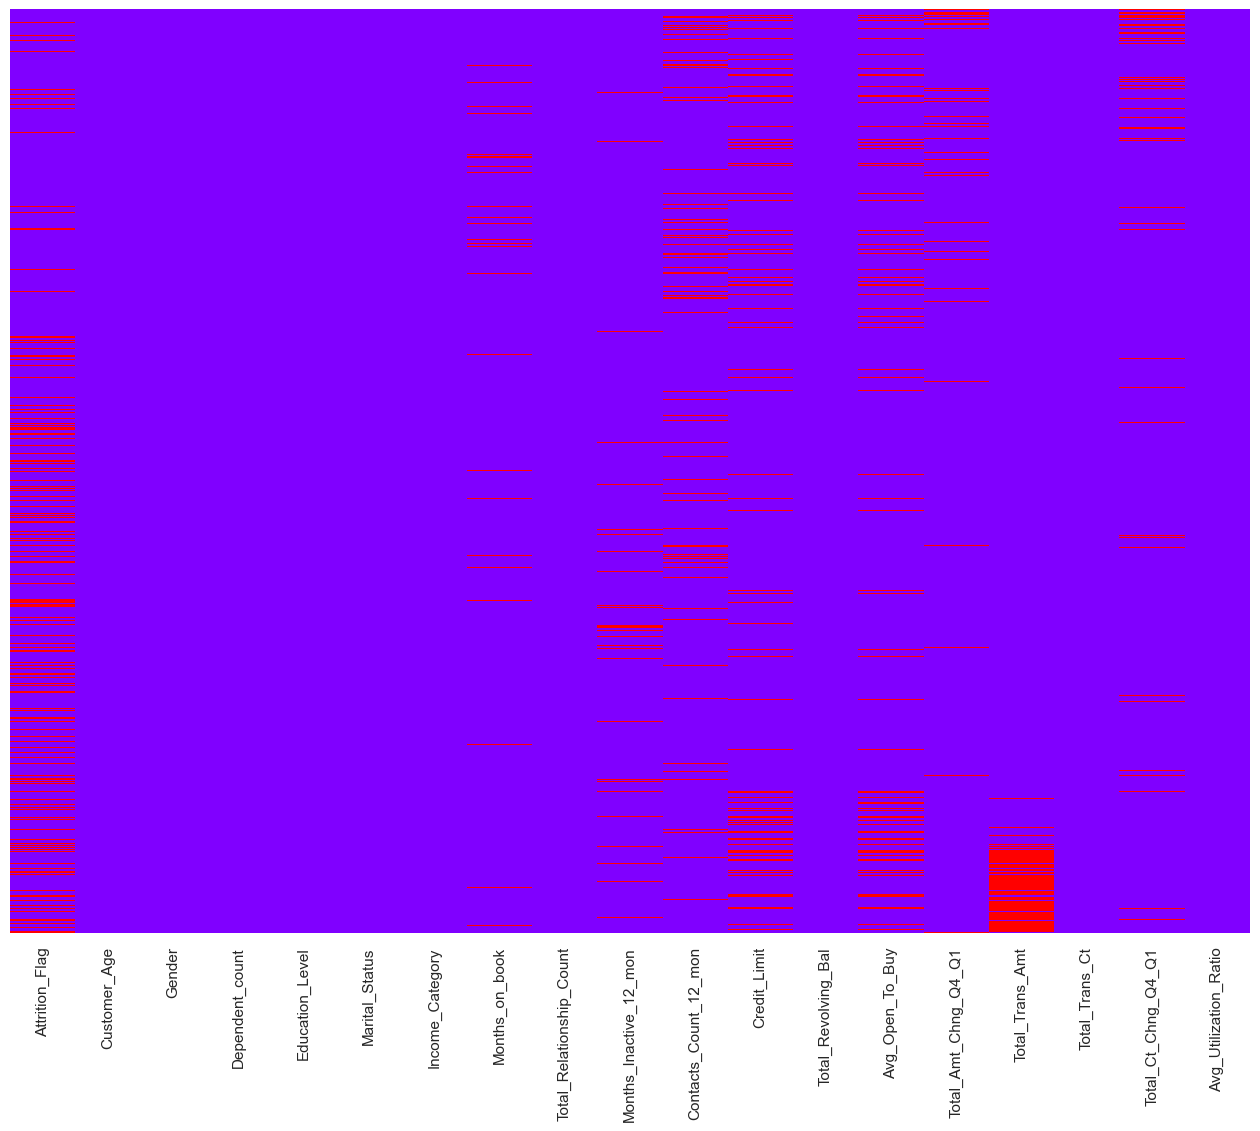

In [44]:
plt.figure(figsize=(16,12))
sns.heatmap(x.isnull(), cbar=False, cmap='rainbow', yticklabels=False)
plt.show()

In [45]:
# Applying capping method by using KNN imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
x_impute = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)


In [46]:
x_impute.isnull().sum().sum()

0

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_impute), columns = x_impute.columns)
x_scaled 

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,-0.164953,0.0,0.503368,-0.052637,-0.628128,-0.574182,0.445710,0.763943,-1.483108,0.560268,1.220812,-0.473422,1.285867,0.272150,-1.436561,-0.974253,0.837358,-0.775882
1,0.0,0.334481,0.0,2.043199,-0.597678,0.727306,0.755053,1.162241,1.407306,-1.483108,-0.543591,0.361275,-0.366667,0.413831,0.161001,-1.355003,-1.358070,0.282038,-0.616276
2,0.0,0.584198,0.0,0.503368,-0.597678,-0.628128,0.090436,0.015792,0.120579,-1.483108,0.339496,-0.576367,-1.426858,-0.352526,-0.208260,-1.024335,-1.912473,-0.704943,-0.997155
3,0.0,-0.789247,0.0,1.273283,-0.052637,2.082739,0.755053,-0.270820,-0.522785,2.064343,-1.647449,-0.596717,1.661686,-0.858160,0.536438,-1.421581,-1.912473,0.765224,1.759686
4,0.0,-0.789247,0.0,0.503368,1.037447,-0.628128,-0.574182,-2.133798,0.763943,-1.483108,0.781040,-0.324805,-1.426858,-0.102216,0.685872,-1.618539,-1.571302,0.609505,-0.997155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.0,0.459340,0.0,-0.266547,-0.597678,0.727306,-1.238799,0.589017,-0.522785,-0.300624,0.560268,-0.462990,0.844455,-0.596665,-0.220610,0.549781,2.224226,0.927812,0.678714
10123,0.0,-0.664388,0.0,-0.266547,1.582489,-1.983561,-1.238799,-1.560574,0.120579,-0.300624,0.560268,-0.409887,1.255524,-0.608429,0.403059,0.819420,0.177200,-0.068329,0.856458
10124,0.0,-0.289812,0.0,-1.036462,-0.052637,-0.628128,0.755053,0.015792,0.763943,0.881859,1.664127,-0.190496,-1.426858,0.031424,0.495683,-0.171698,-0.206618,0.704539,-0.997155
10125,0.0,-2.037833,0.0,-0.266547,-0.597678,2.082739,-1.238799,0.015792,0.120579,0.881859,0.560268,-0.215303,-1.426858,0.006740,-1.258001,2.586389,-0.121325,0.154944,-0.997155


In [48]:
# split the data into training and test.
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
# Feature Selection
# Techniques - Correlation analysis, DT feature importance, RF feature importance
# GDboosting feature importance, XGB feature importance, Regularization - ridge, Lasso, elasticnet
# VIF - regression, permotation importance, recursive feature technique
# PCA, LDA, T-SNA

# popular - recursive feature technique, pca
# EDA -- dtale. dataprep, pandas-profiling, Lux, plotly

In [56]:
# Building ensemble model
# RandomForest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [90]:
f_df = pd.DataFrame({"feature":x_train.columns, 
                    'rf_importance':rf.feature_importances_}).sort_values(by='rf_importance', ascending=False)

In [92]:
f_df

,feature,rf_importance
11,Credit_Limit,0.115703
18,Avg_Utilization_Ratio,0.113923
13,Avg_Open_To_Buy,0.110448
15,Total_Trans_Amt,0.086000
6,Income_Category,0.082384
12,Total_Revolving_Bal,0.068736
16,Total_Trans_Ct,0.068490
17,Total_Ct_Chng_Q4_Q1,0.060482
14,Total_Amt_Chng_Q4_Q1,0.059564
1,Customer_Age,0.047135


In [68]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
print("************************************Confusion Matrix************************************************")
print(confusion_matrix(y_train, pred_train_rf))
print("****************************************************************************************************")      
print(confusion_matrix(y_test, pred_test_rf))     

************************************Confusion Matrix************************************************
[[7548    0    0    0]
 [   0   93    0    0]
 [   0    0   16    0]
 [   0    0    0  444]]
****************************************************************************************************
[[1884    0    0    4]
 [  21    0    0    2]
 [   4    0    0    0]
 [  97    0    0   14]]


In [76]:
print("************************************classification_report************************************************")
print(classification_report(y_train, pred_train_rf))
print("****************************************************************************************************")      
print(classification_report(y_test, pred_test_rf))     

************************************classification_report************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7548
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00       444

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

****************************************************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1888
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.70      0.13      0.21       111

    accuracy                           0.94      2026
   macro avg       0.41      0.2

In [78]:
print("************************************accuracy_score************************************************")
print(accuracy_score(y_train, pred_train_rf))
print("****************************************************************************************************")      
print(accuracy_score(y_test, pred_test_rf))     

************************************accuracy_score************************************************
1.0
****************************************************************************************************
0.9368213228035538


In [80]:
# RandomForest Classifier with feature selection part - recursive feature technique

In [100]:
from sklearn.feature_selection import RFE
rf1 = RandomForestClassifier()
feature_1 = RFE(estimator=rf1, n_features_to_select=17, step=1)
feature_1 = feature_1.fit(x_train, y_train)

In [101]:
pred_train_rf1 = feature_1.predict(x_train)
pred_test_rf1 = feature_1.predict(x_test)

In [104]:
print("************************************accuracy_score************************************************")
print(accuracy_score(y_train, pred_train_rf1))
print("****************************************************************************************************")      
print(accuracy_score(y_test, pred_test_rf1))    

************************************accuracy_score************************************************
1.0
****************************************************************************************************
0.9353405725567621


In [108]:
# Cross validation method
from sklearn.model_selection import cross_val_score
rf_rfe_training = cross_val_score((feature_1), x_train, y_train, cv=10)
print(rf_rfe_training)
print()
print(rf_rfe_training.mean())

[0.93958076 0.94074074 0.9382716  0.93209877 0.94197531 0.93703704
 0.93703704 0.94444444 0.9382716  0.94444444]

0.9393901752142607


In [109]:
# PCA method

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit_transform(x_scaled)

In [116]:
x_train, x_test, y_train, y_test = train_test_split(pca_fit, y, test_size=0.2, random_state=42, stratify=y)

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
pred_train_rf = rf.predict(x_train)
pred_test_rf = rf.predict(x_test)

In [122]:
print("************************************accuracy_score************************************************")
print(accuracy_score(y_train, pred_train_rf1))
print("****************************************************************************************************")      
print(accuracy_score(y_test, pred_test_rf1))    

************************************accuracy_score************************************************
1.0
****************************************************************************************************
0.9353405725567621


In [124]:
# Gradient Booosting package
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [132]:
"""f_df2 = pd.DataFrame({"feature":x_train.columns, 
                    'gb_importance':gb.feature_importances_}).sort_values(by='gb_importance', ascending=False)
f_df2"""

'f_df2 = pd.DataFrame({"feature":x_train.columns, \n                    \'gb_importance\':gb.feature_importances_}).sort_values(by=\'gb_importance\', ascending=False)\nf_df2'

In [126]:
pred_train_gb = gb.predict(x_train)
pred_test_gb = gb.predict(x_test)

In [128]:
print("************************************accuracy_score************************************************")
print(accuracy_score(y_train, pred_train_gb))
print("****************************************************************************************************")      
print(accuracy_score(y_test, pred_test_gb))    

************************************accuracy_score************************************************
0.9488951981236884
****************************************************************************************************
0.9279368213228035
